<a href="https://colab.research.google.com/github/jhsam007/Heart-Disease-Prediction-Using-Deep-Learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [5]:
#importing data
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# remove missing data
df = df[~df.isin(['?'])]

In [7]:
df.shape

(4240, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# drop rows with NaN values
df.dropna(axis = 0, inplace = True) 
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [12]:
# transform data to numeric 
df = df.apply(pd.to_numeric)

In [13]:
df['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [14]:

cols_to_norm = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

data_normalized = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

data_normalized['male'] = df['male']
data_normalized['education'] = df['education']
data_normalized['currentSmoker'] = df['currentSmoker']
data_normalized['BPMeds'] = df['BPMeds']
data_normalized['prevalentStroke'] = df['prevalentStroke']
data_normalized['prevalentHyp'] = df['prevalentHyp']
data_normalized['diabetes'] = df['diabetes']
data_normalized['TenYearCHD'] = df['TenYearCHD']
data_normalized

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.184211,0.000000,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,1,4.0,0,0.0,0,0,0,0
1,0.368421,0.000000,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0,2.0,0,0.0,0,0,0,0
2,0.421053,0.285714,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,1,1.0,1,0.0,0,0,0,0
3,0.763158,0.428571,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,0,3.0,1,0.0,0,1,0,1
4,0.368421,0.328571,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0,3.0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.473684,0.014286,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944,1,1.0,1,0.0,0,1,0,1
4234,0.500000,0.614286,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096,1,3.0,1,0.0,0,0,0,0
4237,0.526316,0.000000,0.320329,0.236407,0.370370,0.143723,0.363636,0.189266,0,2.0,0,0.0,0,0,0,0
4238,0.210526,0.000000,0.147844,0.271868,0.529101,0.243820,0.232323,0.090395,1,3.0,0,0.0,0,1,0,0


In [15]:
df = data_normalized

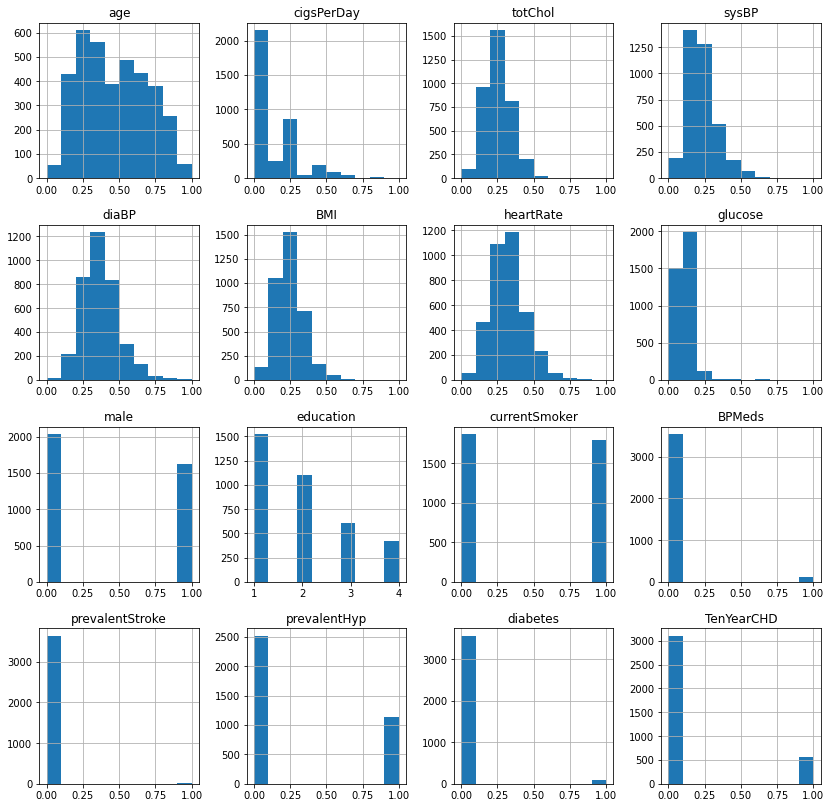

In [16]:
df.hist(figsize=(14,14))
plt.show()

In [93]:
from sklearn import model_selection

X = np.array(df.drop(['TenYearCHD'], axis=1))
y = np.array(df['TenYearCHD'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [94]:
y_train[y_train > 0] = 1
y_test[y_test > 0] = 1
print(y_train[:50])

[1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [95]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation="relu", input_shape=(15,)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4)) 
model.add(tf.keras.layers.Dense(units=32, activation="relu")) 
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=16, activation="relu")) 
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=8, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 
  
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["accuracy"])


In [96]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 128)               2048      
                                                                 
 dropout_56 (Dropout)        (None, 128)               0         
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dropout_58 (Dropout)        (None, 32)                0         
                                                                 
 dense_72 (Dense)            (None, 16)              

In [97]:
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

Epoch 1/300
293/293 [==============================] - 2s 3ms/step - loss: 0.5036 - accuracy: 0.8401
Epoch 2/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4715 - accuracy: 0.8459
Epoch 3/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4588 - accuracy: 0.8465
Epoch 4/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8465
Epoch 5/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.8465
Epoch 6/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.8465
Epoch 7/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.8465
Epoch 8/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.8465
Epoch 9/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8465
Epoch 10/300
293/293 [==============================] - 1s 3ms/step - loss: 0.4258 - accura

In [98]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.8552


In [99]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = np.round(model.predict(X_test)).astype(int)

print("Result:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Result:
0.855191256830601
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       624
           1       1.00      0.02      0.04       108

    accuracy                           0.86       732
   macro avg       0.93      0.51      0.48       732
weighted avg       0.88      0.86      0.79       732

